# Tips
---
* 아래의 순서를 습관적으로!

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tips = pd.read_csv('./datasets/tips.csv')

In [13]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
tips.shape

(244, 7)

In [15]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [16]:
df = tips.copy()

In [18]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


* 원본은 두고 copy하여 사용

In [19]:
df['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [21]:
df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

* 범주형데이터의 여부를 확인하는 작업

In [24]:
df.describe().T #row column의 교체

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


* 숫자형 컬럼에 대한 통계 data
* 이정도면 데이터의 확인이 마무리

## 결측치 확인

In [26]:
sr = df.isna().sum(axis=0) #serise data
sr

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [27]:
sr.index

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

## 중복 duplicated

In [28]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Length: 244, dtype: bool

In [32]:
df.duplicated(keep=False).sum()

2

In [33]:
df[df.duplicated(keep=False)]

,total_bill,tip,sex,smoker,day,time,size
198,13.0,2.0,Female,Yes,Thur,Lunch,2
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [34]:
df.shape

(244, 7)

In [38]:
df.drop_duplicates(keep='first').shape

(243, 7)

In [39]:
df = df.drop_duplicates(keep='first')

In [40]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## 결측치 시각화

<AxesSubplot:>

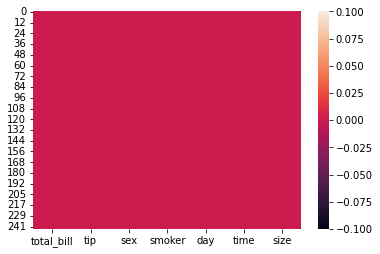

In [42]:
sns.heatmap(df.isnull())

* 결측치를 눈으로 확인해보기

## 산점도

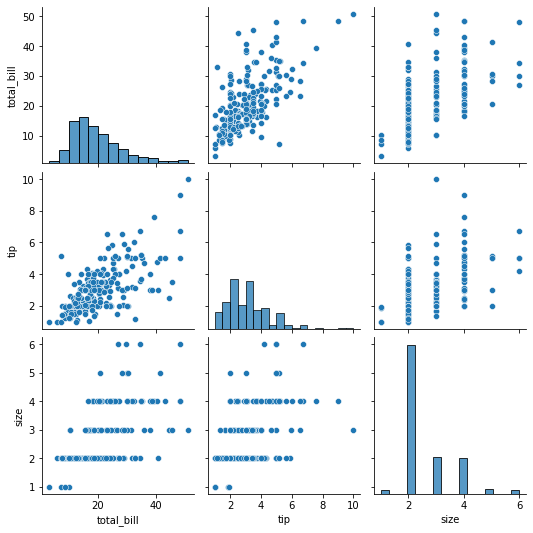

In [44]:
sns.pairplot(df)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

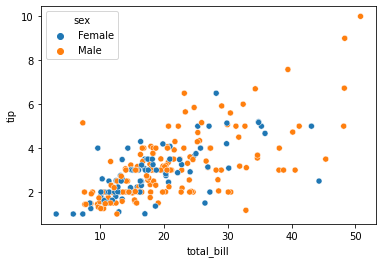

In [45]:
sns.scatterplot(data = df, x='total_bill', y='tip' , hue='sex')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

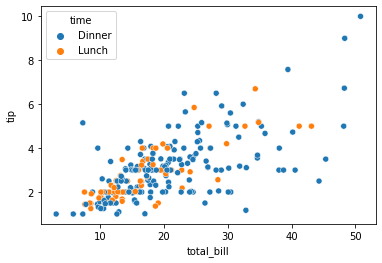

In [46]:
sns.scatterplot(data = df, x='total_bill', y='tip' , hue='time')

<AxesSubplot:xlabel='smoker', ylabel='count'>

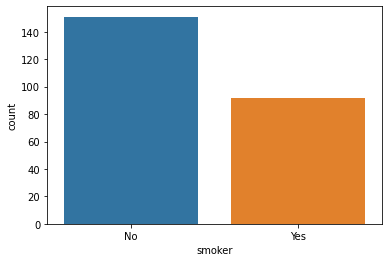

In [51]:
# 흡연자/비흡연자

sns.countplot(x='smoker', data=df)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

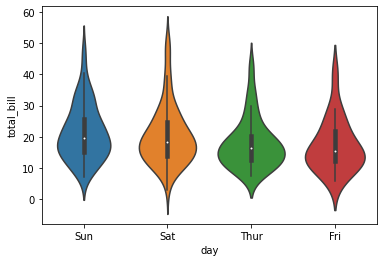

In [52]:
# 날짜별 금액

sns.violinplot(x='day', y='total_bill', data = df)

In [57]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.674998,0.597589
tip,0.674998,1.000000,0.488400
size,0.597589,0.488400,1.000000


* 상관관계 (범위형데이터만)

<AxesSubplot:>

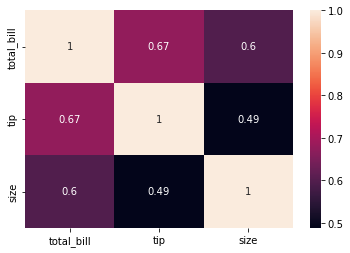

In [58]:
sns.heatmap(df.corr(), annot=True)